Setup
==

In [ ]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
DIR = "C:\\Users\\amatk\\OneDrive\\Dokumenty\\2_Tuebingen\\SoSe_25\\nlp-offensive-language-classifier\\results\\"
base_clean_metrics_path = DIR + "bert_original\\clean\\metrics.csv"
base_pert_metrics_path = DIR + "bert_original\\perturbed\\metrics.csv"
aug_clean_metrics_path = DIR + "bert_augmented\\clean\\metrics.csv"
aug_pert_metrics_path = DIR + "bert_augmented\\perturbed\\metrics.csv"

In [7]:
base_clean_df = pd.read_csv(base_clean_metrics_path)
base_pert_df = pd.read_csv(base_pert_metrics_path)
aug_clean_df = pd.read_csv(aug_clean_metrics_path)
aug_pert_df =pd.read_csv(aug_pert_metrics_path)

In [8]:
base_clean_df

,test_loss,test_model_preparation_time,test_accuracy,test_f1_macro,test_f1_weighted,test_hate_speech_precision,test_hate_speech_recall,test_hate_speech_f1,test_offensive_precision,test_offensive_recall,test_offensive_f1,test_neither_precision,test_neither_recall,test_neither_f1,test_runtime,test_samples_per_second,test_steps_per_second
0,0.31561,0.0049,0.901829,0.77169,0.906804,0.413559,0.570093,0.479371,0.953331,0.929489,0.941259,0.900974,0.888,0.89444,6.1768,601.926,18.942


Plot metrics
=

In [ ]:
def plot_metric(metric):
    """ Function that plots a given metric for all variants of the model in one graph"""
    


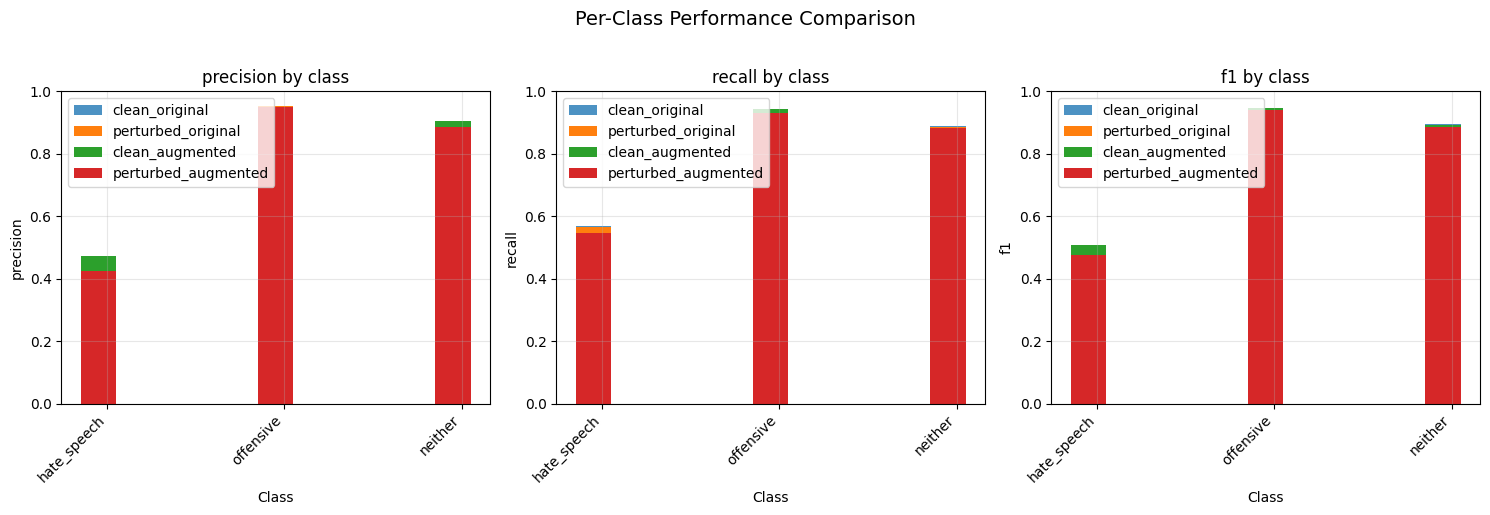

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics_to_plot = ['precision', 'recall', 'f1']
for idx, metric in enumerate(metrics_to_plot):

    ax = axes[idx]
    classes = ['hate_speech', 'offensive', 'neither']

    base_clean_values = [base_clean_df[f"test_{cls}_{metric}"].iloc[0] for cls in classes]
    base_pert_values = [base_pert_df[f"test_{cls}_{metric}"].iloc[0] for cls in classes]
    aug_clean_values = [aug_clean_df[f"test_{cls}_{metric}"].iloc[0] for cls in classes]
    aug_pert_values = [aug_pert_df[f"test_{cls}_{metric}"].iloc[0] for cls in classes]

    

    x = np.arange(len(classes))
    width = 0.8 / len(groups)
    bars1 = ax.bar(x-width/4, base_clean_values, width, label="clean_original", alpha = 0.8)
    bars2 = ax.bar(x-width/4, base_pert_values, width, label="perturbed_original")
    bars3 = ax.bar(x-width/4, aug_clean_values, width, label="clean_augmented")
    bars4 = ax.bar(x-width/4, aug_pert_values, width, label="perturbed_augmented")


    ax.set_xlabel("Class")
    ax.set_ylabel(metric)
    ax.set_title(f"{metric} by class")
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation=45, ha='right')
    ax.legend()
    ax.set_ylim([0, 1])
    ax.grid(True, alpha=0.3)
    

plt.suptitle('Per-Class Performance Comparison', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()   


<Axes: xlabel='metric', ylabel='value'>

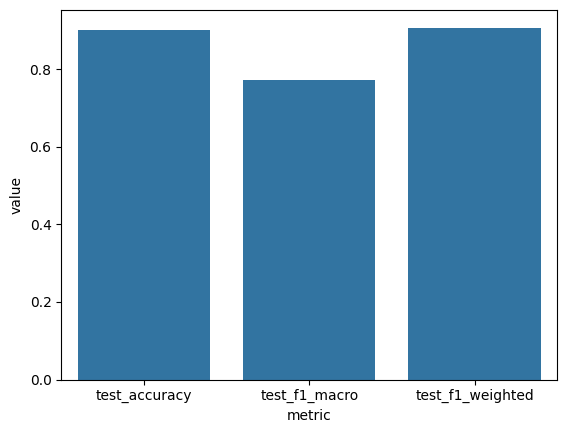

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

sns.barplot(x = "metric", y="value", data= test_df)

Create confusion matrices

In [9]:
test_path_aug = DIR + "bert_augmented\\clean\\test_predictions.csv"
pert_test_path_aug = DIR + "bert_augmented\\perturbed\\test_predictions.csv"
test_path_orig = DIR + "bert_original\\clean\\test_predictions.csv"
pert_test_path_orig = DIR + "bert_original\\perturbed\\test_predictions.csv"

In [10]:
test_aug = pd.read_csv(test_path_aug)
pert_test_aug = pd.read_csv(pert_test_path_aug)
test_orig = pd.read_csv(test_path_orig)
pert_test_orig = pd.read_csv(pert_test_path_orig)

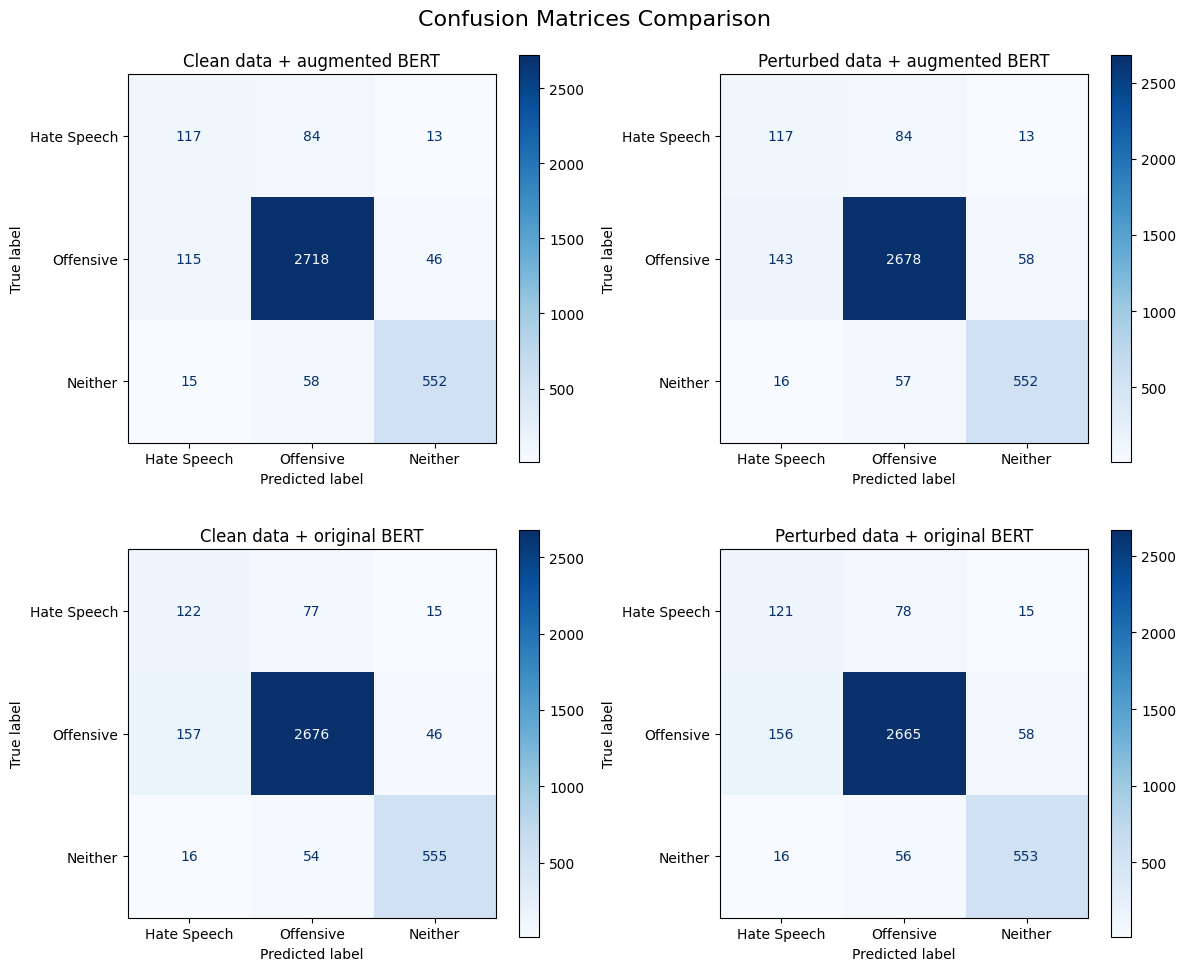

In [ ]:
#get the true and predicted labels in a list
true_labels_list = [test_aug["true_label"], pert_test_aug["true_label"], test_orig["true_label"], pert_test_orig["true_label"]]
pred_labels_list = [test_aug["predicted_label"], pert_test_aug["predicted_label"], test_orig["predicted_label"], pert_test_orig["predicted_label"]]
titles = ["Clean data + augmented BERT", "Perturbed data + augmented BERT", "Clean data + original BERT", "Perturbed data + original BERT"]

# Create a 2x2 grid for plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Shared title
fig.suptitle("Confusion Matrices Comparison", fontsize=16)

for ax, true, pred, title in zip(axs.ravel(), true_labels_list, pred_labels_list, titles):
    disp = ConfusionMatrixDisplay.from_predictions(true, pred, cmap="Blues",ax=ax)
    ax.set_title(title)
    ax.set_xticklabels(["Hate Speech", "Offensive", "Neither"])
    ax.set_yticklabels(["Hate Speech", "Offensive", "Neither"])

plt.tight_layout()
plt.savefig("bert_eval_confusion_matrices.png", bbox_inches="tight")
plt.show()
